# Scraping: H&M Sales

**It's officially hot outside**, which means we need some summertime clothes. We live in New York City, though, so all our money goes to rent: we need to shop *as cheaply as possible*. So let's shop [sales at H&M](http://www.hm.com/us/products/sale)!

**Answer the questions below using either Men's or Women's sale items at H&M.**

## Preparation: knowing your tags

### What is the tag name and class name for a product?

In [2]:
# <div> class_="product-title"

### What is the tag name and class name for the old price? The new price?

In [3]:
# old price: <span> class_="old-price"
# new price: <span> class_="price"

### What is the tag name and class name for the link to the product page?

In [4]:
# <a> class_="product-url js-product-tracking"

## Setup: Import what you'll need to scrape the page

Use `requests`, not `urllib`.

In [5]:
from bs4 import BeautifulSoup
import requests

In [6]:
response = requests.get("http://www.hm.com/us/products/sale/men")
doc = BeautifulSoup(response.text, 'html.parser')

## Try to scrape the page: how many product names can you find?

"Try" to do it, because it *will not work.* Once you've learned that it won't work, spend a few minutes **looking at the page code** to see if you can figure out why.

Eventually, ask for help by writing on the board.

In [7]:
doc.find_all(class_= "product-list-item")
products = doc.find_all(class_= "product-list-item")

In [8]:
len(products)

0

In [9]:
url = "http://api.hm.com/v2/us/en/products/display?categories=sale%2Fmen&concealCategories=true&pageSize=60&page=1&deviceType=DESKTOP"
response = requests.get(url)
data = response.json()
data

{'content': [],
 'displayArticles': [{'activityArticleNumber': '750994',
   'additionalImages': [],
   'articleCode': '65743-D',
   'assortmentState': 'CURRENT',
   'availableSizeInfo': [{'sizeName': 'XS', 'stockSize': '003'},
    {'sizeName': 'S', 'stockSize': '004'},
    {'sizeName': 'M', 'stockSize': '005'},
    {'sizeName': 'L', 'stockSize': '006'},
    {'sizeName': 'XL', 'stockSize': '007'},
    {'sizeName': 'XXL', 'stockSize': '008'}],
   'availableSwatches': [{'articleCode': '65743-D',
     'castorArticleId': '0451456001',
     'colour': 'abc0ef',
     'fabricImageResource': '/fabric/2017/7232AAAF-1C35-4CA5-B671-B87C82B71B04.jpg',
     'fabricUrl': '//lp.hm.com/hmprod?set=source[/fabric/2017/7232AAAF-1C35-4CA5-B671-B87C82B71B04.jpg]&call=url[file:/mobile/v1/fabric/sprite]'}],
   'castorArticleNumber': '001',
   'castorProductNumber': '0451456',
   'colourDescription': 'Denim blue',
   'departments': [{'code': 'MEN',
     'name': 'NAVIGATION.LABEL.DEPARTMENT.MEN',
     'paths': [

In [10]:
data.keys()

dict_keys(['searchInfo', 'pagination', 'recommendations', 'displayArticles', 'filter', 'trackingInfo', 'content'])

In [11]:
data['displayArticles'][0].keys()

dict_keys(['productNumber', 'castorProductNumber', 'castorArticleNumber', 'articleCode', 'name', 'availableSizeInfo', 'primaryImage', 'webUrl', 'availableSwatches', 'trackingInfo', 'additionalImages', 'textualMarkers', 'priceInfo', 'stockState', 'assortmentState', 'colourDescription', 'activityArticleNumber', 'departments'])

In [12]:
data['displayArticles'][0]['name']

'Short-sleeved Shirt Slim fit'

## URLs

### What is the URL for data about on-sale men's clothing?

In [13]:
url_men = "http://api.hm.com/v2/us/en/products/display?categories=sale%2Fmen&concealCategories=true&pageSize=60&page=1&deviceType=DESKTOP"

### What is the URL for data about on-sale women's clothing?

In [14]:
url_women = "http://api.hm.com/v2/us/en/products/display?categories=sale%2Fladies&concealCategories=true&pageSize=60&page=1&deviceType=DESKTOP"

### What is the URL for data about on-sale women's tops?

In [15]:
url_women_tops = "http://api.hm.com/v2/us/en/products/display?categories=sale%2Fladies%2Ftops&concealCategories=true&pageSize=60&page=1&deviceType=DESKTOP"

### What changes about the url based on what you're looking for?

In [16]:
# men VS ladies?
# When looking for data about on-sale women's tops the word "tops" is added in the url to specify the query. 

## Request on-sale women's tops.

### How many results do you get?

In [17]:
url_women_tops = "http://api.hm.com/v2/us/en/products/display?categories=sale%2Fladies%2Ftops&concealCategories=true&pageSize=60&page=1&deviceType=DESKTOP"
response = requests.get(url_women_tops)
data = response.json()

In [18]:
type(data)

dict

In [19]:
data.keys()

dict_keys(['searchInfo', 'pagination', 'recommendations', 'displayArticles', 'filter', 'trackingInfo', 'content'])

In [20]:
len(data['displayArticles'])

60

### How many total results are there? How do you change the URL to get more?

There are a few ways to change the URL to: there is one very easy way and one a-little-difficult way.

In [21]:
url_women_tops = "http://api.hm.com/v2/us/en/products/display?categories=sale%2Fladies%2Ftops&concealCategories=true&pageSize=400&page=1&deviceType=DESKTOP"
response = requests.get(url_women_tops)
data = response.json()

In [22]:
data.keys()

dict_keys(['searchInfo', 'pagination', 'recommendations', 'displayArticles', 'filter', 'trackingInfo', 'content'])

In [23]:
len(data['displayArticles'])

361

In [24]:
# I have been manually changing the initial "pageSize=60" to "pageSize=100", "pageSize=200", "pageSize=300" etc. 
# When I passed the limit (i.e. writting "pageSize=400") it returned 359 results. 

### Download all on-sale women's tops and save them to a CSV.

I want this CSV to include

- Name
- Product code/number
- Old price
- On-sale price
- Item's URL

In [25]:
#(data['displayArticles'][358])

In [26]:
HM_tops = data['displayArticles']

In [27]:
tops = []

for top in HM_tops:
    on_sale_tops = {}
    product_name = top['name']
    if product_name:
        print('Product Name:', product_name)
        on_sale_tops['Product Name'] = product_name
    product_code = top['activityArticleNumber']
    if product_code:
        print('Product Code:', product_code)
        on_sale_tops['Product Code'] = product_code
    product_prices = top['priceInfo']
    product_old_price = product_prices['formattedOldPrice']
    if product_old_price:
        print('Product Old Price:', product_old_price)
        on_sale_tops['Product Old Price'] = product_old_price
    product_on_sale_practice = product_prices['price']
    if product_on_sale_practice:
        print('Product On Sale Price:', product_on_sale_practice)
        on_sale_tops['Product On Sale Price'] = product_on_sale_practice
    product_url = top['webUrl']
    if product_url:
        print('Product URL:', product_url)
        on_sale_tops['Product URL'] = product_url
        tops.append(on_sale_tops)
        print(on_sale_tops)
        print("-------")

Product Name: Short-sleeved Top
Product Code: 724476
Product Old Price: $9.99
Product On Sale Price: 6.99
Product URL: http://www.hm.com/us/product/65274?article=65274-B
{'Product Name': 'Short-sleeved Top', 'Product Code': '724476', 'Product Old Price': '$9.99', 'Product On Sale Price': 6.99, 'Product URL': 'http://www.hm.com/us/product/65274?article=65274-B'}
-------
Product Name: Short-sleeved Top
Product Code: 758058
Product Old Price: $9.99
Product On Sale Price: 6.99
Product URL: http://www.hm.com/us/product/65274?article=65274-A
{'Product Name': 'Short-sleeved Top', 'Product Code': '758058', 'Product Old Price': '$9.99', 'Product On Sale Price': 6.99, 'Product URL': 'http://www.hm.com/us/product/65274?article=65274-A'}
-------
Product Name: Short-sleeved Top
Product Code: 044907
Product Old Price: $9.99
Product On Sale Price: 6.99
Product URL: http://www.hm.com/us/product/65274?article=65274-F
{'Product Name': 'Short-sleeved Top', 'Product Code': '044907', 'Product Old Price': '

Product URL: http://www.hm.com/us/product/67801?article=67801-B
{'Product Name': 'Draped Top', 'Product Code': '749234', 'Product Old Price': '$17.99', 'Product On Sale Price': 9.99, 'Product URL': 'http://www.hm.com/us/product/67801?article=67801-B'}
-------
Product Name: Off-the-shoulder Top
Product Code: 313602
Product Old Price: $12.99
Product On Sale Price: 7.99
Product URL: http://www.hm.com/us/product/58147?article=58147-G
{'Product Name': 'Off-the-shoulder Top', 'Product Code': '313602', 'Product Old Price': '$12.99', 'Product On Sale Price': 7.99, 'Product URL': 'http://www.hm.com/us/product/58147?article=58147-G'}
-------
Product Name: Jersey Top
Product Code: 537666
Product Old Price: $14.99
Product On Sale Price: 5.99
Product URL: http://www.hm.com/us/product/44402?article=44402-C
{'Product Name': 'Jersey Top', 'Product Code': '537666', 'Product Old Price': '$14.99', 'Product On Sale Price': 5.99, 'Product URL': 'http://www.hm.com/us/product/44402?article=44402-C'}
-------


Product Code: 188603
Product Old Price: $14.99
Product On Sale Price: 9.99
Product URL: http://www.hm.com/us/product/68459?article=68459-J
{'Product Name': 'Wide-cut Camisole Top', 'Product Code': '188603', 'Product Old Price': '$14.99', 'Product On Sale Price': 9.99, 'Product URL': 'http://www.hm.com/us/product/68459?article=68459-J'}
-------
Product Name: Cotton T-shirt
Product Code: 593018
Product Old Price: $12.99
Product On Sale Price: 6.99
Product URL: http://www.hm.com/us/product/64432?article=64432-F
{'Product Name': 'Cotton T-shirt', 'Product Code': '593018', 'Product Old Price': '$12.99', 'Product On Sale Price': 6.99, 'Product URL': 'http://www.hm.com/us/product/64432?article=64432-F'}
-------
Product Name: Jersey Top
Product Code: 707380
Product Old Price: $14.99
Product On Sale Price: 9.99
Product URL: http://www.hm.com/us/product/64735?article=64735-A
{'Product Name': 'Jersey Top', 'Product Code': '707380', 'Product Old Price': '$14.99', 'Product On Sale Price': 9.99, 'Pr

{'Product Name': 'Short Satin Top', 'Product Code': '828972', 'Product Old Price': '$34.99', 'Product On Sale Price': 17.99, 'Product URL': 'http://www.hm.com/us/product/47995?article=47995-A'}
-------
Product Name: Draped Top
Product Code: 429721
Product Old Price: $19.99
Product On Sale Price: 9.99
Product URL: http://www.hm.com/us/product/61712?article=61712-D
{'Product Name': 'Draped Top', 'Product Code': '429721', 'Product Old Price': '$19.99', 'Product On Sale Price': 9.99, 'Product URL': 'http://www.hm.com/us/product/61712?article=61712-D'}
-------
Product Name: Jersey Top
Product Code: 041555
Product Old Price: $14.99
Product On Sale Price: 9.99
Product URL: http://www.hm.com/us/product/64828?article=64828-E
{'Product Name': 'Jersey Top', 'Product Code': '041555', 'Product Old Price': '$14.99', 'Product On Sale Price': 9.99, 'Product URL': 'http://www.hm.com/us/product/64828?article=64828-E'}
-------
Product Name: Long-sleeved T-shirt
Product Code: 182978
Product Old Price: $17

In [28]:
import pandas as pd
%matplotlib inline

In [29]:
df = pd.DataFrame(tops)
df.head()

,Product Code,Product Name,Product Old Price,Product On Sale Price,Product URL
0,724476,Short-sleeved Top,$9.99,6.99,http://www.hm.com/us/product/65274?article=652...
1,758058,Short-sleeved Top,$9.99,6.99,http://www.hm.com/us/product/65274?article=652...
2,044907,Short-sleeved Top,$9.99,6.99,http://www.hm.com/us/product/65274?article=652...
3,820093,Short-sleeved Top,$9.99,6.99,http://www.hm.com/us/product/65274?article=652...
4,721398,Jersey Top,$12.99,5.00,http://www.hm.com/us/product/60133?article=601...


In [30]:
df.to_csv("tops.csv", index=False)

## Analyzing on-sale items

### Read in the on-sale CSV and make sure the data looks right

In [31]:
tops_df = pd.read_csv("tops.csv")
tops_df.head()

,Product Code,Product Name,Product Old Price,Product On Sale Price,Product URL
0,724476,Short-sleeved Top,$9.99,6.99,http://www.hm.com/us/product/65274?article=652...
1,758058,Short-sleeved Top,$9.99,6.99,http://www.hm.com/us/product/65274?article=652...
2,44907,Short-sleeved Top,$9.99,6.99,http://www.hm.com/us/product/65274?article=652...
3,820093,Short-sleeved Top,$9.99,6.99,http://www.hm.com/us/product/65274?article=652...
4,721398,Jersey Top,$12.99,5.00,http://www.hm.com/us/product/60133?article=601...


### Convert the prices to numbers, if you haven't already

In [32]:
tops_df['Product Old Price'] = tops_df['Product Old Price'].str.replace('$', '').astype(float)
tops_df.head()

,Product Code,Product Name,Product Old Price,Product On Sale Price,Product URL
0,724476,Short-sleeved Top,9.99,6.99,http://www.hm.com/us/product/65274?article=652...
1,758058,Short-sleeved Top,9.99,6.99,http://www.hm.com/us/product/65274?article=652...
2,44907,Short-sleeved Top,9.99,6.99,http://www.hm.com/us/product/65274?article=652...
3,820093,Short-sleeved Top,9.99,6.99,http://www.hm.com/us/product/65274?article=652...
4,721398,Jersey Top,12.99,5.00,http://www.hm.com/us/product/60133?article=601...


### What is the average on-sale price of a women's top? Make a histogram, too, please.

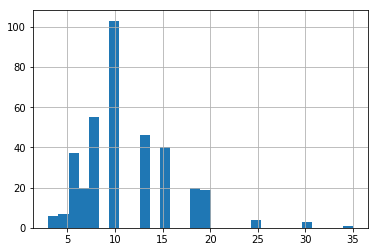

In [33]:
tops_df["Product On Sale Price"].mean()
tops_df["Product On Sale Price"].hist(bins=30)

### What is the average discount between full price and on sale? Histogram too, please.

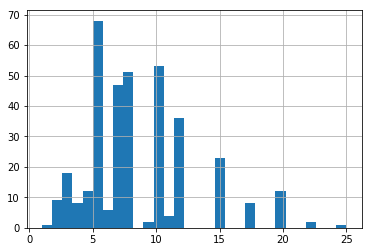

In [53]:
tops_df['Discount'] = tops_df["Product Old Price"] - tops_df["Product On Sale Price"]
#tops_df
tops_df['Discount'].mean()
tops_df['Discount'].hist(bins=30)

### What is the average discount as a percentage of the full price? Histogram too, please.

In [54]:
tops_df ['Discount %'] = tops_df["Product On Sale Price"] / tops_df["Product Old Price"] * 100
tops_df ['Discount %'].mean()

57.408489517903362

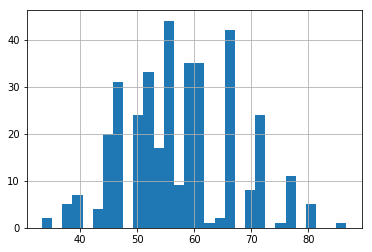

In [55]:
tops_df ['Discount %'].hist(bins=30)

## Shopping the sales

### How many items are over 50% off?


In [51]:
tops_df[tops_df['Discount %'] >= 50].shape

(270, 7)

### Display all items above 50% off.

Pandas doesn't want to show you every row. Change its settings so it will display up to **200 rows of content.**

In [56]:
tops_df_over_50 = tops_df[tops_df['Discount %'] >= 50]
tops_df_over_50

,Product Code,Product Name,Product Old Price,Product On Sale Price,Product URL,Discount,Discount %
0,724476,Short-sleeved Top,9.99,6.99,http://www.hm.com/us/product/65274?article=652...,3.00,69.969970
1,758058,Short-sleeved Top,9.99,6.99,http://www.hm.com/us/product/65274?article=652...,3.00,69.969970
2,44907,Short-sleeved Top,9.99,6.99,http://www.hm.com/us/product/65274?article=652...,3.00,69.969970
3,820093,Short-sleeved Top,9.99,6.99,http://www.hm.com/us/product/65274?article=652...,3.00,69.969970
16,48984,Striped Jersey Top,14.99,9.99,http://www.hm.com/us/product/64644?article=646...,5.00,66.644430
17,589094,Boat-neck Top,14.99,7.99,http://www.hm.com/us/product/38259?article=382...,7.00,53.302201
18,759700,Pleated Top,17.99,9.99,http://www.hm.com/us/product/67571?article=675...,8.00,55.530850
19,793281,Pleated Top,17.99,9.99,http://www.hm.com/us/product/67571?article=675...,8.00,55.530850
20,207686,Short-sleeved Top,9.99,6.99,http://www.hm.com/us/product/65274?article=652...,3.00,69.969970
21,449629,Top with Lace,24.99,12.99,http://www.hm.com/us/product/68451?article=684...,12.00,51.980792
